# **Brief**
The CEO of CS-Streaming has brought you and your team in to analyse Netflix data for their new
streaming service. They are confident that your analysis will be helpful to you in making decisions
about their service. They need your expertise to uncover trends and insights from the Netflix data that
will be beneficial to their new product. They are eager to begin this project and will therefore need a
timely response.
You are to report on how CS-Streaming can best optimise its services and compete with Netflix.

As this dataset lacked user data, I analysed the content on its own, to try and predict what would be a highly rated film. 


# **Import relevant Python Packages an dataset**


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


Import the netflix data set

In [4]:
df = pd.read_csv('/content/netflix_titles_nov_2019.csv')


**Clean DataSet**

View the first 5 rows of the dataset

In [5]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


View how many rows and columns I am working with

In [6]:
df.shape

(5837, 12)

To check for column names, Null values and data types:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


Looking at the above, the director, cast, country, date_added and rating columns are all missing some values. To see the exact number of missing values for each column:

In [8]:
df.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

Before I start carrying out any EDA, I still need to make sense of the data set, and know exactly what is contained within. I wanted to see if the show_id appeared more than once, and whether that meant that a show was more popular or not. As it turned out, all show_ids were unique, therefore suggesting the netflix dataset was not to be viewed in a 'Rating' style format.

In [9]:
df['show_id'].value_counts().max()

1

change categorical data to time format

In [10]:
netflix_newdate = df.copy()

In [11]:
netflix_newdate['new_date'] = pd.to_datetime(netflix_newdate['date_added'])
print(netflix_newdate['new_date'].dtype)


datetime64[ns]


In [12]:
netflix_newdate.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,new_date
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019-11-30
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11-30
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019-11-30
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019-11-29
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaT


# **EDA**


In [13]:

show_type = df['type'].value_counts()
show_type


Movie      3939
TV Show    1898
Name: type, dtype: int64

Create visualization for show type:

<AxesSubplot:title={'center':'Number of Movies vs Number of Tv Shows'}, xlabel='Viewing Type', ylabel='Count'>

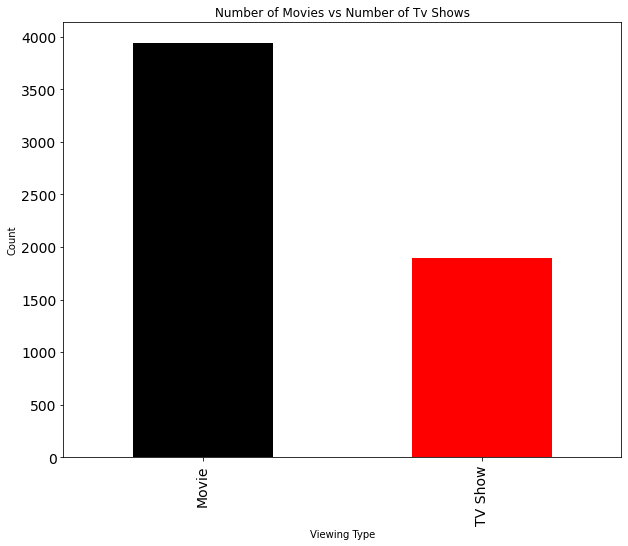

In [14]:
show_type.plot(kind='bar', title='Number of Movies vs Number of Tv Shows', xlabel='Viewing Type', ylabel='Count', color=['black', 'red'], figsize=(10,8), fontsize=14,)

Next I want to find out the average length of *movies*, and view the distribution of all movie lenghts.

Create a movie only dataset:

In [15]:
movie_only = df[df['type'] == 'Movie']
movie_only.shape

(3939, 12)

As the movie column values are recorded as string (as minutes), I need to remove the word 'min', then turn the string into a float, for aggregation purposes.

In [16]:
movie_only['duration'] = movie_only['duration'].str.replace('min', '')
movie_only['duration'] = movie_only['duration'].astype(float)

<ipython-input-16-f4b09d873ea4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_only['duration'] = movie_only['duration'].str.replace('min', '')
<ipython-input-16-f4b09d873ea4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_only['duration'] = movie_only['duration'].astype(float)


In [17]:
movie_mean = movie_only['duration'].mean()
movie_mean

98.02919522721503

In [18]:
movie_only.duration.describe()

count    3939.000000
mean       98.029195
std        27.719096
min         3.000000
25%        85.000000
50%        97.000000
75%       113.000000
max       312.000000
Name: duration, dtype: float64

Histogram to visualize findings:

Text(0.5, 0, 'Duration in minutes')

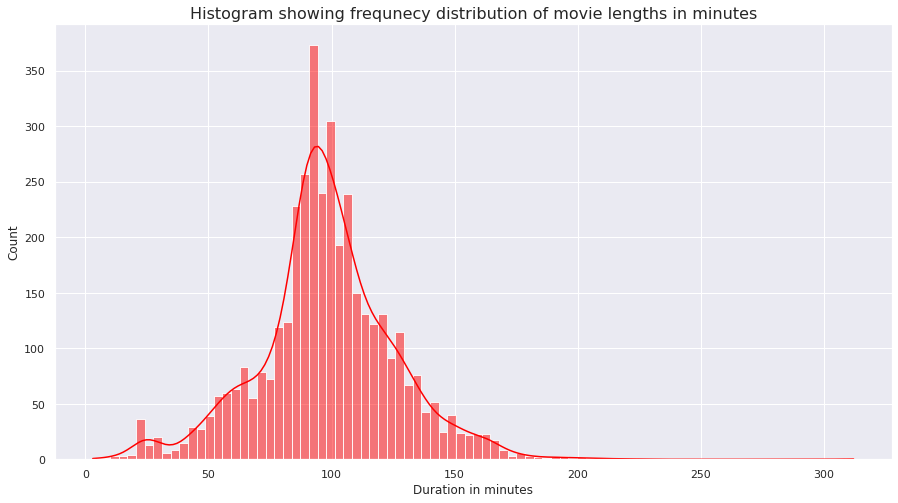

In [60]:

sns.histplot(movie_only.duration, kde=True, color='red',)

plt.title("Histogram showing frequnecy distribution of movie lengths in minutes", fontsize=16);
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel('Duration in minutes')


Now I will look at the most common movie type:

In [20]:

popular_movie_types = movie_only['listed_in'].value_counts()[:10]
popular_movie_types

Documentaries                                       297
Stand-Up Comedy                                     265
Dramas, International Movies                        238
Dramas, Independent Movies, International Movies    170
Comedies, Dramas, International Movies              157
Documentaries, International Movies                 147
Children & Family Movies                            115
Comedies, International Movies                      113
Children & Family Movies, Comedies                  110
Action & Adventure, Dramas, International Movies     96
Name: listed_in, dtype: int64

*Just for fun i wanted to see how many horror films were listed*

In [21]:
horror_check = movie_only[movie_only['listed_in'].str.contains('Horror')].value_counts().sum()
print(horror_check)

223


remove commas from movie genre in new column.then append to list and find individual words count / distinct words count. **(I later realised I would not actually use this column)**

In [22]:
movie_only['new_listed'] = movie_only['listed_in'].str.replace(',', '')

<ipython-input-22-3d3db966e537>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_only['new_listed'] = movie_only['listed_in'].str.replace(',', '')


In [23]:
movie_only

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,new_listed
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67.0,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,Documentaries International Movies
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135.0,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,Comedies Dramas International Movies
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106.0,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,Dramas Independent Movies International Movies
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107.0,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie,Comedies International Movies Thrillers
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81.0,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie,Dramas Independent Movies International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,70154110,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France","May 17, 2011",2010,NR,103.0,"Dramas, International Movies",While making a film about the incursion of Chr...,Movie,Dramas International Movies
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84.0,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,Cult Movies Horror Movies
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29.0,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,Horror Movies
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104.0,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,Dramas International Movies


Create series from the 'listed_in' column

In [24]:
movie_genre = movie_only['listed_in']


In [25]:
movie_type_list = []

for i in movie_genre:
  
  movie_type_list.append(i)

Checking the list

In [26]:
movie_type_list[0:10]

['Documentaries, International Movies',
 'Comedies, Dramas, International Movies',
 'Dramas, Independent Movies, International Movies',
 'Comedies, International Movies, Thrillers',
 'Dramas, Independent Movies, International Movies',
 'Dramas, International Movies',
 'Comedies, International Movies',
 'Comedies, Independent Movies, International Movies',
 'Action & Adventure, Comedies, International Movies',
 'Dramas, International Movies, Thrillers']

**Here again I  did not need to do the below (as the series where already split by commas. This was becuase I thought I was accessing 'new_listed' column. In my though process i overlooked what i was actually trying to do. **

In [27]:
>>> movie_type_list
>>> new_genre_list = [x for xs in movie_type_list for x in xs.split(',')]



In [28]:
new_genre_list[0:10]

['Documentaries',
 ' International Movies',
 'Comedies',
 ' Dramas',
 ' International Movies',
 'Dramas',
 ' Independent Movies',
 ' International Movies',
 'Comedies',
 ' International Movies']

As the new_genre_list had some white spaces, I added the below code to strip them. I noticed on an earlier calucaltion that 'Dramas was being counted as two separeat elements, one with the: **' Dramas** and the other: **Dramas** (no-space)

In [29]:
new_genre_list = [x.strip(' ') for x in new_genre_list]


Turn the list back into a series, so i could conduct the value_counts method

In [30]:
genre_series = pd.Series(new_genre_list) 

In [31]:
count_of_genre = genre_series.value_counts()
count_of_genre

International Movies        1797
Dramas                      1488
Comedies                     992
Documentaries                658
Action & Adventure           532
Independent Movies           516
Thrillers                    353
Children & Family Movies     340
Romantic Movies              338
Stand-Up Comedy              273
Horror Movies                229
Music & Musicals             229
Sci-Fi & Fantasy             165
Sports Movies                149
Classic Movies                65
LGBTQ Movies                  59
Movies                        55
Faith & Spirituality          46
Cult Movies                   42
Anime Features                41
dtype: int64

Bar chart viz of the different movie genres:

Text(0.5, 1.0, 'Count of Differet Movie Genres')

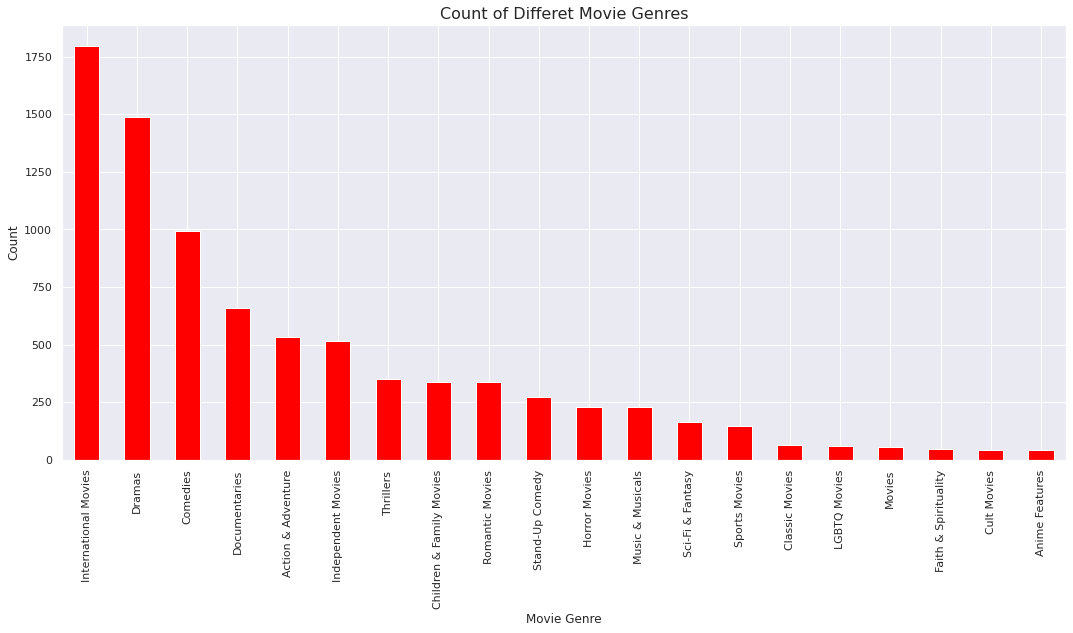

In [32]:

count_of_genre.plot(kind='bar', figsize=(18,8), color='red', xlabel='Movie Genre', ylabel='Count',)
plt.title('Count of Differet Movie Genres', fontsize=16)

From the ininital anaylsis of Movie vs Tv Show, to average movie length to movie genre, i will now filter for the movie genre with the highest amount. (As I could not fully define the genre for 'International Movies', I decieded to focus on 'Dramas'. (Please see full explanation in Conclusion)

In [33]:
 drama_movie = movie_only[movie_only['listed_in'].str.contains('Dramas')]
 drama_movie

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,new_listed
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135.0,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,Comedies Dramas International Movies
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106.0,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,Dramas Independent Movies International Movies
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81.0,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie,Dramas Independent Movies International Movies
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107.0,"Dramas, International Movies",The life and times of iconic South African lib...,Movie,Dramas International Movies
14,81172901,The Island,Toka McBaror,"Sambasa Nzeribe, Segun Arinze, Tokunbo Idowu, ...",Nigeria,"November 29, 2019",2018,TV-14,93.0,"Dramas, International Movies, Thrillers",When a colonel uncovers controversial intel ab...,Movie,Dramas International Movies Thrillers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,70206826,Victim of Beauty,Roger Young,"William Devane, Jeri Ryan, Michele Abrams, Nic...",United States,"October 1, 2011",1991,NR,93.0,"Dramas, Thrillers",A beauty pageant winner is stalked by a serial...,Movie,Dramas Thrillers
5830,60003155,Joseph: King of Dreams,"Rob LaDuca, Robert C. Ramirez","Ben Affleck, Mark Hamill, Richard Herd, Mauree...",United States,"September 27, 2011",2000,TV-PG,75.0,"Children & Family Movies, Dramas, Faith & Spir...",With his gift of dream interpretation and his ...,Movie,Children & Family Movies Dramas Faith & Spirit...
5831,70154110,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France","May 17, 2011",2010,NR,103.0,"Dramas, International Movies",While making a film about the incursion of Chr...,Movie,Dramas International Movies
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104.0,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,Dramas International Movies


Standard Deviation and removing outliers

In [34]:
mean1 = movie_mean
std_deviation = movie_only['duration'].std()
under_std = mean1 - 3*std_deviation
over_std = mean1 + 3*std_deviation
print(under_std)
print(over_std)

14.871905799883862
181.18648465454618


In [35]:
drama_movie_time = drama_movie[(drama_movie.duration > under_std) & (drama_movie.duration < over_std)]

#  & (drama_movie[drama_movie['duration'] < over_std])
drama_movie_time

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,new_listed
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135.0,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,Comedies Dramas International Movies
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106.0,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,Dramas Independent Movies International Movies
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81.0,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie,Dramas Independent Movies International Movies
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107.0,"Dramas, International Movies",The life and times of iconic South African lib...,Movie,Dramas International Movies
14,81172901,The Island,Toka McBaror,"Sambasa Nzeribe, Segun Arinze, Tokunbo Idowu, ...",Nigeria,"November 29, 2019",2018,TV-14,93.0,"Dramas, International Movies, Thrillers",When a colonel uncovers controversial intel ab...,Movie,Dramas International Movies Thrillers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,70206826,Victim of Beauty,Roger Young,"William Devane, Jeri Ryan, Michele Abrams, Nic...",United States,"October 1, 2011",1991,NR,93.0,"Dramas, Thrillers",A beauty pageant winner is stalked by a serial...,Movie,Dramas Thrillers
5830,60003155,Joseph: King of Dreams,"Rob LaDuca, Robert C. Ramirez","Ben Affleck, Mark Hamill, Richard Herd, Mauree...",United States,"September 27, 2011",2000,TV-PG,75.0,"Children & Family Movies, Dramas, Faith & Spir...",With his gift of dream interpretation and his ...,Movie,Children & Family Movies Dramas Faith & Spirit...
5831,70154110,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France","May 17, 2011",2010,NR,103.0,"Dramas, International Movies",While making a film about the incursion of Chr...,Movie,Dramas International Movies
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104.0,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,Dramas International Movies


Interquartile Range, finding the the spread of the middle 50% of values.

In [36]:
ideal_time_frame = drama_movie_time['duration']

print("Q1 of time frame : ", np.quantile(ideal_time_frame, .25, interpolation='midpoint'))
print("Q2 of time frame : ", np.quantile(ideal_time_frame, .50, interpolation='midpoint'))
print("Q3 of time frame : ", np.quantile(ideal_time_frame, .75, interpolation='midpoint'))
dur_q1 = np.quantile(ideal_time_frame, .25, interpolation='midpoint')
dur_q2 = np.quantile(ideal_time_frame, .50, interpolation='midpoint')
dur_q3 = np.quantile(ideal_time_frame, .75, interpolation='midpoint')

Q1 of time frame :  96.0
Q2 of time frame :  108.0
Q3 of time frame :  125.0


<ipython-input-36-5ec4dbaf5e1b>:3: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  print("Q1 of time frame : ", np.quantile(ideal_time_frame, .25, interpolation='midpoint'))
<ipython-input-36-5ec4dbaf5e1b>:4: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  print("Q2 of time frame : ", np.quantile(ideal_time_frame, .50, interpolation='midpoint'))
<ipython-input-36-5ec4dbaf5e1b>:5: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the metho

In [37]:
drama_movie_time['duration'].describe()

count    1473.000000
mean      111.957909
std        21.943285
min        15.000000
25%        96.000000
50%       108.000000
75%       125.000000
max       180.000000
Name: duration, dtype: float64

Masking the data frame to find required rows

In [38]:
new_drama_df =  drama_movie[(drama_movie.duration > dur_q1) & (drama_movie.duration < dur_q3)]
new_drama_df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,new_listed
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106.0,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,Dramas Independent Movies International Movies
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107.0,"Dramas, International Movies",The life and times of iconic South African lib...,Movie,Dramas International Movies
21,60020826,The Score,Frank Oz,"Robert De Niro, Edward Norton, Marlon Brando, ...","Germany, Canada, United States","November 28, 2019",2001,R,124.0,"Dramas, Thrillers","Ready-to-retire safecracker Nick, flamboyant f...",Movie,Dramas Thrillers
26,81177504,The Body Remembers When the World Broke Open,"Elle-Máijá Tailfeathers, Kathleen Hepburn","Violet Nelson, Elle-Máijá Tailfeathers, Charli...","Canada, Norway","November 27, 2019",2019,TV-MA,106.0,"Dramas, Independent Movies","After a traumatic event, two Indigenous women ...",Movie,Dramas Independent Movies
34,81215481,Pranaam,Sanjiv Jaiswal,"Rajeev Khandelwal, Samiksha Singh, S.M. Zaheer...",India,"November 25, 2019",2019,TV-MA,117.0,"Action & Adventure, Dramas, International Movies",Aspiring to fulfill his father’s dream and bec...,Movie,Action & Adventure Dramas International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5597,80085439,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102.0,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...,Movie,Comedies Dramas Independent Movies
5645,70118799,Ip Man,Wilson Yip,"Donnie Yen, Simon Yam, Louis Fan, Lam Ka Tung,...","Hong Kong, China","January 15, 2016",2008,R,107.0,"Action & Adventure, Dramas, International Movies",An occupying Japanese general challenges Chine...,Movie,Action & Adventure Dramas International Movies
5685,80082739,Fifty,Biyi Bandele,"Dakore Akande, Ireti Doyle, Nse Ikpe-Etim, Omo...",Nigeria,"December 28, 2015",2015,NR,101.0,"Dramas, International Movies","In Lagos, Nigeria, four successful women on th...",Movie,Dramas International Movies
5831,70154110,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France","May 17, 2011",2010,NR,103.0,"Dramas, International Movies",While making a film about the incursion of Chr...,Movie,Dramas International Movies


To filter the dateset further, I wanted to identify what was written as the ***first*** genre in the listed_in column. I would then filter out any rows that 'dramas' did no apperar first in.

In [39]:
test_drama_df = new_drama_df.copy()


In [40]:
def drama_only(string):
  if string[0:6] == 'Dramas':
    string = string[:6]

  return string 

In [41]:
test_drama_df['drama_only_col'] = test_drama_df['listed_in'].apply(drama_only)


In [42]:
test_drama_df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,new_listed,drama_only_col
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106.0,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,Dramas Independent Movies International Movies,Dramas
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107.0,"Dramas, International Movies",The life and times of iconic South African lib...,Movie,Dramas International Movies,Dramas
21,60020826,The Score,Frank Oz,"Robert De Niro, Edward Norton, Marlon Brando, ...","Germany, Canada, United States","November 28, 2019",2001,R,124.0,"Dramas, Thrillers","Ready-to-retire safecracker Nick, flamboyant f...",Movie,Dramas Thrillers,Dramas
26,81177504,The Body Remembers When the World Broke Open,"Elle-Máijá Tailfeathers, Kathleen Hepburn","Violet Nelson, Elle-Máijá Tailfeathers, Charli...","Canada, Norway","November 27, 2019",2019,TV-MA,106.0,"Dramas, Independent Movies","After a traumatic event, two Indigenous women ...",Movie,Dramas Independent Movies,Dramas
34,81215481,Pranaam,Sanjiv Jaiswal,"Rajeev Khandelwal, Samiksha Singh, S.M. Zaheer...",India,"November 25, 2019",2019,TV-MA,117.0,"Action & Adventure, Dramas, International Movies",Aspiring to fulfill his father’s dream and bec...,Movie,Action & Adventure Dramas International Movies,"Action & Adventure, Dramas, International Movies"


In [43]:
new_only_drama_genre = test_drama_df[test_drama_df['drama_only_col'] == 'Dramas']
new_only_drama_genre.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,new_listed,drama_only_col
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106.0,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,Dramas Independent Movies International Movies,Dramas
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107.0,"Dramas, International Movies",The life and times of iconic South African lib...,Movie,Dramas International Movies,Dramas
21,60020826,The Score,Frank Oz,"Robert De Niro, Edward Norton, Marlon Brando, ...","Germany, Canada, United States","November 28, 2019",2001,R,124.0,"Dramas, Thrillers","Ready-to-retire safecracker Nick, flamboyant f...",Movie,Dramas Thrillers,Dramas
26,81177504,The Body Remembers When the World Broke Open,"Elle-Máijá Tailfeathers, Kathleen Hepburn","Violet Nelson, Elle-Máijá Tailfeathers, Charli...","Canada, Norway","November 27, 2019",2019,TV-MA,106.0,"Dramas, Independent Movies","After a traumatic event, two Indigenous women ...",Movie,Dramas Independent Movies,Dramas
38,80125671,Shot Caller,Ric Roman Waugh,"Nikolaj Coster-Waldau, Omari Hardwick, Lake Be...",United States,"November 24, 2019",2017,R,121.0,"Dramas, Thrillers","Trying to go straight, a once-successful busin...",Movie,Dramas Thrillers,Dramas


I wanted to see the distribution of country locations for the mentioned drama movies.

In [44]:
new_only_drama_genre.country.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [45]:
country_list = []

for (i) in new_only_drama_genre.country:
  country_list.append(i)


For the below code, this may be redundant: 
I would need further time to go through this code.

In [46]:
new_country_list = [str(x).replace('','') for x in country_list]


In [47]:
new_country_list1 = [x for xs in new_country_list for x in xs.split(',')]

Checking new list:

In [48]:
new_country_list1

['France',
 ' Senegal',
 ' Belgium',
 'South Africa',
 'Germany',
 ' Canada',
 ' United States',
 'Canada',
 ' Norway',
 'United States',
 'France',
 'Australia',
 ' France',
 'United States',
 'United States',
 'United States',
 'United Kingdom',
 ' France',
 'United States',
 'United States',
 'South Korea',
 'India',
 'United States',
 'United States',
 'United States',
 'Italy',
 'United States',
 ' United Kingdom',
 'United States',
 'United States',
 'United States',
 'United Kingdom',
 ' United States',
 'Italy',
 ' Belgium',
 ' France',
 'Israel',
 ' United States',
 'Turkey',
 'Egypt',
 ' Austria',
 ' United States',
 'Belgium',
 ' Luxembourg',
 ' France',
 'Nigeria',
 'nan',
 'Nigeria',
 'Nigeria',
 'United States',
 'Nigeria',
 'United States',
 'Australia',
 ' United States',
 'Indonesia',
 'India',
 'United States',
 'United States',
 ' Germany',
 'United States',
 'Poland',
 'United States',
 'United States',
 'United States',
 'India',
 'France',
 'Canada',
 ' United Sta

In [49]:
new_country_list1 = [x.strip(' ') for x in new_country_list1]
new_country_list1

['France',
 'Senegal',
 'Belgium',
 'South Africa',
 'Germany',
 'Canada',
 'United States',
 'Canada',
 'Norway',
 'United States',
 'France',
 'Australia',
 'France',
 'United States',
 'United States',
 'United States',
 'United Kingdom',
 'France',
 'United States',
 'United States',
 'South Korea',
 'India',
 'United States',
 'United States',
 'United States',
 'Italy',
 'United States',
 'United Kingdom',
 'United States',
 'United States',
 'United States',
 'United Kingdom',
 'United States',
 'Italy',
 'Belgium',
 'France',
 'Israel',
 'United States',
 'Turkey',
 'Egypt',
 'Austria',
 'United States',
 'Belgium',
 'Luxembourg',
 'France',
 'Nigeria',
 'nan',
 'Nigeria',
 'Nigeria',
 'United States',
 'Nigeria',
 'United States',
 'Australia',
 'United States',
 'Indonesia',
 'India',
 'United States',
 'United States',
 'Germany',
 'United States',
 'Poland',
 'United States',
 'United States',
 'United States',
 'India',
 'France',
 'Canada',
 'United States',
 'United King

Create series to conduct value_counts method: 

In [50]:
country_series = pd.Series(new_country_list1) 
pie_country = country_series.value_counts()[:10]
pie_country

United States     157
India             129
France             57
United Kingdom     46
Germany            29
Spain              28
Belgium            18
Canada             13
Italy              12
Indonesia          12
dtype: int64

The below code was to enable me to label the pie chart:

In [51]:
dict_pie = dict(pie_country)

In [52]:
dict_pie

{'United States': 157,
 'India': 129,
 'France': 57,
 'United Kingdom': 46,
 'Germany': 29,
 'Spain': 28,
 'Belgium': 18,
 'Canada': 13,
 'Italy': 12,
 'Indonesia': 12}

In [53]:
country_name_list = list(dict_pie.keys())

In [54]:
country_name_list

['United States',
 'India',
 'France',
 'United Kingdom',
 'Germany',
 'Spain',
 'Belgium',
 'Canada',
 'Italy',
 'Indonesia']

Display viz of movie location

Text(0.5, 1.0, 'Distribution of the Top Ten Netflix Movie Locations')

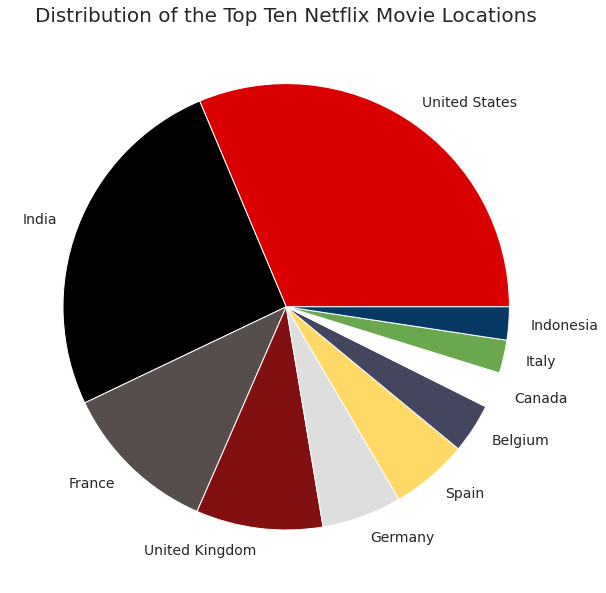

In [55]:

fig, ax = plt.subplots(figsize =(10, 16))
ax.pie(pie_country, labels=country_name_list, textprops={'fontsize': 14}, colors = ['#db0000', '#000000', '#564d4d', '#831010', '#dedede', '#ffd966', '#43465e', '#ffffff', '#6aa84f', '#073763'])
ax.set_title('Distribution of the Top Ten Netflix Movie Locations', fontsize=20)



In [56]:
india_df = new_only_drama_genre[new_only_drama_genre.country == 'India'] 

usa_df = new_only_drama_genre[new_only_drama_genre.country == 'United States']

india_df.head(1)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,new_listed,drama_only_col
172,81206389,Oththa Seruppu Size 7,Parthiban,Parthiban,India,"November 4, 2019",2019,TV-MA,103.0,"Dramas, International Movies, Thrillers","Taken into custody, a murder suspect's theatri...",Movie,Dramas International Movies Thrillers,Dramas


In [57]:
usa_df.head(1)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,new_listed,drama_only_col
38,80125671,Shot Caller,Ric Roman Waugh,"Nikolaj Coster-Waldau, Omari Hardwick, Lake Be...",United States,"November 24, 2019",2017,R,121.0,"Dramas, Thrillers","Trying to go straight, a once-successful busin...",Movie,Dramas Thrillers,Dramas


Concatenating the two new data frames together

In [64]:
us_india_df = pd.concat([india_df, usa_df], axis=0)
us_india_df.sample(5)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,new_listed,drama_only_col
1299,81123050,Hamid,Aijaz Khan,"Talha Arshad Reshi, Rasika Dugal, Vikas Kumar,...",India,"May 15, 2019",2018,TV-14,108.0,"Dramas, Independent Movies, International Movies","Wanting his missing father to come home, a Kas...",Movie,Dramas Independent Movies International Movies,Dramas
3904,80184135,Super Dark Times,Kevin Phillips,"Owen Campbell, Charlie Tahan, Elizabeth Cappuc...",United States,"January 1, 2018",2017,TV-MA,104.0,"Dramas, Independent Movies, Thrillers",A tragic accident drives a wedge between two t...,Movie,Dramas Independent Movies Thrillers,Dramas
3537,80171733,Roxanne Roxanne,Michael Larnell,"Chanté Adams, Mahershala Ali, Nia Long, Elvis ...",United States,"March 23, 2018",2018,TV-MA,100.0,Dramas,She grew up in a tough New York neighborhood i...,Movie,Dramas,Dramas
2327,80187471,Power Paandi,Dhanush,"Rajkiran, Dhanush, Prasanna, Chaya Singh, Reva...",India,"December 1, 2018",2017,TV-14,124.0,"Dramas, International Movies","Retired, restless and constantly butting heads...",Movie,Dramas International Movies,Dramas
2107,81045060,Merku Thodarchi Malai,Lenin Bharathi,"Antony, Gayathri Krishna, Abu Valayamkulam, An...",India,"January 1, 2019",2018,TV-MA,115.0,"Dramas, Independent Movies, International Movies","In southern India, a laborer's dreams of ownin...",Movie,Dramas Independent Movies International Movies,Dramas


In [59]:
us_india_df.shape

(221, 14)

# **Conclusion**

From my analysis, it appears that CS Streaming should initially populate their service with Movies. They should then pick movies with a genre of 'Dramas', and then choose movies from the either of the following countries: United States or India (this includes any from the new Dataframe: us_india_df).

Finally they should list these movies with a time length closest to 108 minutes, but keeping anywhere between 96 minutes (Q1 of time frame), but not over 125 minutes(Q3 of time frame). 

Given more time, further Analysis is required for the genre/type: 'International Movie' as I could not find a catergorical genre for this (other than 'a film being made outside of 'HollyWood' (https://en.wikipedia.org/wiki/World_cinema). I would further search for: the relationship between film release year and film added onto netflix, the most common words in description column and most common director. 
Tv Show analysis would also be required.